In [1]:
import pandas as pd
import os

In [2]:
all_data = list()
for root, b, files in os.walk("./data/Subway"):
    for file in files:
        file_path = root + "/" + file
        print (file_path)
        all_data.append(pd.read_csv(file_path, encoding='euc-kr'))

./data/Subway/Subway_201601.csv
./data/Subway/Subway_201602.csv
./data/Subway/Subway_201603.csv
./data/Subway/Subway_201604.csv
./data/Subway/Subway_201605.csv
./data/Subway/Subway_201606.csv
./data/Subway/Subway_201607.csv
./data/Subway/Subway_201608.csv
./data/Subway/Subway_201609.csv
./data/Subway/Subway_201610.csv
./data/Subway/Subway_201611.csv
./data/Subway/Subway_201612.csv


In [3]:
#출력해보면 위치랑 항목이 다름
for data in all_data:
    print(data.columns)

Index(['날짜', '호선', '역명', '구 분', '할인', '04 ~ 05', '05 ~ 06', '06 ~ 07',
       '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13',
       '13 ~ 14', '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19',
       '19 ~ 20', '20 ~ 21', '21 ~ 22', '22 ~ 23', '23 ~ 24', '00 ~ 01',
       '01 ~ 02', '02 ~ 03', '03 ~ 04'],
      dtype='object')
Index(['날짜', '호선', '역명', '구 분', '할인', '04 ~ 05', '05 ~ 06', '06 ~ 07',
       '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13',
       '13 ~ 14', '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19',
       '19 ~ 20', '20 ~ 21', '21 ~ 22', '22 ~ 23', '23 ~ 24', '00 ~ 01',
       '01 ~ 02', '02 ~ 03', '03 ~ 04'],
      dtype='object')
Index(['날짜', '호선', '역명', '구 분', '할인', '04 ~ 05', '05 ~ 06', '06 ~ 07',
       '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13',
       '13 ~ 14', '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19',
       '19 ~ 20', '20 ~ 21', '21 ~ 22', '22 ~ 23', '23 ~ 24', '00 ~ 01',
    

In [4]:
# 정리된 1월 ~ 5월까지 데이터프레임 
all_data_1 = list()
for month in all_data[:5]:
    tmp = month.groupby(['날짜', '호선', '역명', '구 분']).agg('sum')
    tmp.reset_index(inplace=True)
    tmp.drop(['호선', '04 ~ 05', '02 ~ 03', '03 ~ 04'], axis=1, inplace=True)
    all_data_1.append(tmp)

In [5]:
df1 = pd.concat(all_data_1)

In [6]:
df1.head(10)

,날짜,역명,구 분,05 ~ 06,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,...,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,00 ~ 01,01 ~ 02
0,2016-01-01,동대문(155),승차,147,168,170,293,479,543,625,...,1034,1065,625,614,475,414,291,138,6,0
1,2016-01-01,동대문(155),하차,31,164,146,164,354,487,901,...,1167,1158,869,827,660,614,471,348,122,0
2,2016-01-01,동묘앞(159),승차,37,65,66,110,161,245,344,...,1129,975,404,198,139,136,81,52,2,0
3,2016-01-01,동묘앞(159),하차,19,75,88,147,199,359,661,...,587,353,231,165,149,146,176,144,106,0
4,2016-01-01,서울역(150),승차,405,339,584,1144,1723,2087,2983,...,3554,3200,3076,2519,2281,2398,2056,996,58,0
5,2016-01-01,서울역(150),하차,341,1637,1753,1856,2438,2425,2548,...,3108,2656,2134,1859,1394,1344,1056,612,222,0
6,2016-01-01,시청(151),승차,98,127,110,191,298,582,700,...,1339,1458,1499,1383,1284,1198,675,375,9,0
7,2016-01-01,시청(151),하차,68,306,554,939,689,665,884,...,1035,951,792,618,402,309,192,114,34,0
8,2016-01-01,신설동(156),승차,113,176,172,301,354,471,593,...,587,605,497,335,248,220,166,70,2,0
9,2016-01-01,신설동(156),하차,52,126,111,188,245,282,371,...,462,492,424,386,311,373,452,278,71,0


In [7]:
#6월~11월 데이터
all_data_2 = list()
for month in all_data[5:-1]:
    all_data_2.append(month[['날짜', '역명', '구분', '05~06', '06~07', '07~08', '08~09', '09~10', '10~11',
       '11~12', '12~13', '13~14', '14~15', '15~16', '16~17', '17~18', '18~19',
       '19~20', '20~21', '21~22', '22~23', '23~24', '00~01', '01~02']])

In [8]:
#12월 데이터
all_data[-1]

,역명,날짜,구분,05~06시,06~07시,07~08시,08~09시,09~10시,10~11시,11~12시,...,16~17시,17~18시,18~19시,19~20시,20~21시,21~22시,22~23시,23~24시,00~01시,01~02시
0,서울역(150),2016-12-01,승차,411,552,1792,3429,2737,2430,3161,...,4145,4984,9595,5217,3492,3978,2742,1380,198,0
1,서울역(150),2016-12-01,하차,280,1680,4629,10313,5586,2920,2673,...,2905,3084,3715,2723,1794,1657,1533,761,373,32
2,서울역(150),2016-12-02,승차,434,520,1695,3456,2848,2568,3398,...,5180,6141,10682,6169,4169,4479,4554,1794,443,0
3,서울역(150),2016-12-02,하차,255,1609,4504,10225,5322,3050,2435,...,3692,3545,5575,3389,2141,2076,1928,1074,547,64
4,서울역(150),2016-12-03,승차,543,467,982,2080,3000,3077,4340,...,8023,6418,6575,4904,4742,4683,4654,1697,228,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7373,남태령(434),2016-12-29,하차,2,26,189,238,68,64,30,...,46,57,67,78,36,50,39,24,17,0
7374,남태령(434),2016-12-30,승차,18,23,125,165,111,80,61,...,93,162,275,164,41,29,22,10,1,0
7375,남태령(434),2016-12-30,하차,4,39,75,154,61,30,20,...,47,66,81,59,47,30,34,25,14,0
7376,남태령(434),2016-12-31,승차,16,22,19,93,81,71,60,...,142,246,307,36,15,24,10,9,0,0


In [9]:
month12 = all_data[-1][['날짜', '역명', '구분', '05~06시', '06~07시', '07~08시', '08~09시', '09~10시',
       '10~11시', '11~12시', '12~13시', '13~14시', '14~15시', '15~16시', '16~17시',
       '17~18시', '18~19시', '19~20시', '20~21시', '21~22시', '22~23시', '23~24시',
       '00~01시', '01~02시']]

In [10]:
df2 = pd.concat(all_data_2)

In [11]:
df1.columns = df2.columns.tolist()
month12.columns = df2.columns.tolist()

In [12]:
month12

,날짜,역명,구분,05~06,06~07,07~08,08~09,09~10,10~11,11~12,...,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00~01,01~02
0,2016-12-01,서울역(150),승차,411,552,1792,3429,2737,2430,3161,...,4145,4984,9595,5217,3492,3978,2742,1380,198,0
1,2016-12-01,서울역(150),하차,280,1680,4629,10313,5586,2920,2673,...,2905,3084,3715,2723,1794,1657,1533,761,373,32
2,2016-12-02,서울역(150),승차,434,520,1695,3456,2848,2568,3398,...,5180,6141,10682,6169,4169,4479,4554,1794,443,0
3,2016-12-02,서울역(150),하차,255,1609,4504,10225,5322,3050,2435,...,3692,3545,5575,3389,2141,2076,1928,1074,547,64
4,2016-12-03,서울역(150),승차,543,467,982,2080,3000,3077,4340,...,8023,6418,6575,4904,4742,4683,4654,1697,228,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7373,2016-12-29,남태령(434),하차,2,26,189,238,68,64,30,...,46,57,67,78,36,50,39,24,17,0
7374,2016-12-30,남태령(434),승차,18,23,125,165,111,80,61,...,93,162,275,164,41,29,22,10,1,0
7375,2016-12-30,남태령(434),하차,4,39,75,154,61,30,20,...,47,66,81,59,47,30,34,25,14,0
7376,2016-12-31,남태령(434),승차,16,22,19,93,81,71,60,...,142,246,307,36,15,24,10,9,0,0


In [13]:
df_all = pd.concat([df1, df2, month12])

In [14]:
df1.head(1)

,날짜,역명,구분,05~06,06~07,07~08,08~09,09~10,10~11,11~12,...,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00~01,01~02
0,2016-01-01,동대문(155),승차,147,168,170,293,479,543,625,...,1034,1065,625,614,475,414,291,138,6,0


In [15]:
df2.head(1)

,날짜,역명,구분,05~06,06~07,07~08,08~09,09~10,10~11,11~12,...,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00~01,01~02
0,2016-06-01,서울역(150),승차,521,538,2111,3391,2454,2385,2821,...,3764,5060,9536,5169,3393,3820,2440,1355,202,0


In [16]:
df_all.head(5)

,날짜,역명,구분,05~06,06~07,07~08,08~09,09~10,10~11,11~12,...,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00~01,01~02
0,2016-01-01,동대문(155),승차,147,168,170,293,479,543,625,...,1034,1065,625,614,475,414,291,138,6,0
1,2016-01-01,동대문(155),하차,31,164,146,164,354,487,901,...,1167,1158,869,827,660,614,471,348,122,0
2,2016-01-01,동묘앞(159),승차,37,65,66,110,161,245,344,...,1129,975,404,198,139,136,81,52,2,0
3,2016-01-01,동묘앞(159),하차,19,75,88,147,199,359,661,...,587,353,231,165,149,146,176,144,106,0
4,2016-01-01,서울역(150),승차,405,339,584,1144,1723,2087,2983,...,3554,3200,3076,2519,2281,2398,2056,996,58,0


In [17]:
df_all.to_csv("./data/Subway/Subway_2016.csv", encoding='utf-8-sig')

In [18]:
last_day = df_all.query("날짜 == '2016-12-31' & 역명=='서울역(150)'")

In [19]:
last_day

,날짜,역명,구분,05~06,06~07,07~08,08~09,09~10,10~11,11~12,...,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00~01,01~02
60,2016-12-31,서울역(150),승차,429,453,673,1412,1683,2362,3682,...,5891,5657,4629,3853,2804,3467,3170,1629,444,179
61,2016-12-31,서울역(150),하차,251,1355,1555,1859,2735,2675,2632,...,3960,3947,3259,3016,2611,2840,2216,1399,1724,2069


In [20]:
mask = (last_day.iloc[:,3:].diff(axis=0).iloc[1,] < 0).values

In [21]:
last_day.iloc[:,3:].iloc[:,mask]

,05~06,11~12,12~13,13~14,15~16,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24
60,429,3682,3930,4248,4512,5891,5657,4629,3853,2804,3467,3170,1629
61,251,2632,3644,3509,3571,3960,3947,3259,3016,2611,2840,2216,1399


In [22]:
df_all['역명'].unique()

array(['동대문(155)', '동묘앞(159)', '서울역(150)', '시청(151)', '신설동(156)',
       '제기동(157)', '종각(152)', '종로3가(153)', '종로5가(154)', '청량리(지하)(158)',
       '강남(222)', '강변(214)', '건대입구(212)', '교대(223)', '구로디지털단지(232)',
       '구의(213)', '낙성대(227)', '당산(237)', '대림(233)', '도림천(247)',
       '동대문역사문화공원(205)', '뚝섬(210)', '문래(235)', '방배(225)', '봉천(229)',
       '사당(226)', '삼성(219)', '상왕십리(207)', '서울대입구(228)', '서초(224)',
       '선릉(220)', '성수(211)', '시청(201)', '신답(245)', '신당(206)', '신대방(231)',
       '신도림(234)', '신림(230)', '신설동(246)', '신정네거리(249)', '신천(217)',
       '신촌(240)', '아현(242)', '양천구청(248)', '역삼(221)', '영등포구청(236)',
       '왕십리(성동구청)(208)', '용답(244)', '용두(250)', '을지로3가(203)', '을지로4가(204)',
       '을지로입구(202)', '이대(241)', '잠실(216)', '잠실나루(215)', '종합운동장(218)',
       '충정로(243)', '한양대(209)', '합정(238)', '홍대입구(239)', '가락시장(340)',
       '경복궁(317)', '경찰병원(341)', '고속터미널(329)', '교대(330)', '구파발(310)',
       '금호(324)', '남부터미널(331)', '녹번(313)', '대청(337)', '대치(335)',
       '도곡(334)', '독립문(316)', '동대입구(32

In [66]:
kangnam = df_all.query("역명 == '강남(222)'").copy() #에러가 나지 않으려면 copy()를 써야함

In [67]:
kangnam['월'] = kangnam['날짜'].apply(lambda x : x[:7]) #파생 데이터프레임에서 수정할 때 나타나는 에러 -> 이럴게 할거면 깊은 복사를 해 (copy()를 써야함)

In [25]:
kangnam_month = kangnam.groupby(['월']).agg('sum')

In [26]:
graph = kangnam_month.apply(lambda x : sum(x), axis=1)

In [68]:
graph

월
2016-01    6565737
2016-02    5755230
2016-03    6308157
2016-04    5856535
2016-05    5919827
2016-06    5826363
2016-07    6788786
2016-08    6355968
2016-09    5460894
2016-10    5851270
2016-11    5929904
2016-12    6371249
dtype: int64

In [27]:
import matplotlib.pyplot as plt

In [28]:
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 16
fig_size[1] = 9
plt.rcParams['figure.figsize'] = fig_size
print (fig_size)

[16, 9]


In [29]:
import matplotlib.font_manager as fm

In [ ]:
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "C:\\Windows\\Fonts\\malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [33]:
font_name

'New Gulim'

In [34]:
plt.rc('font', family=font_name)

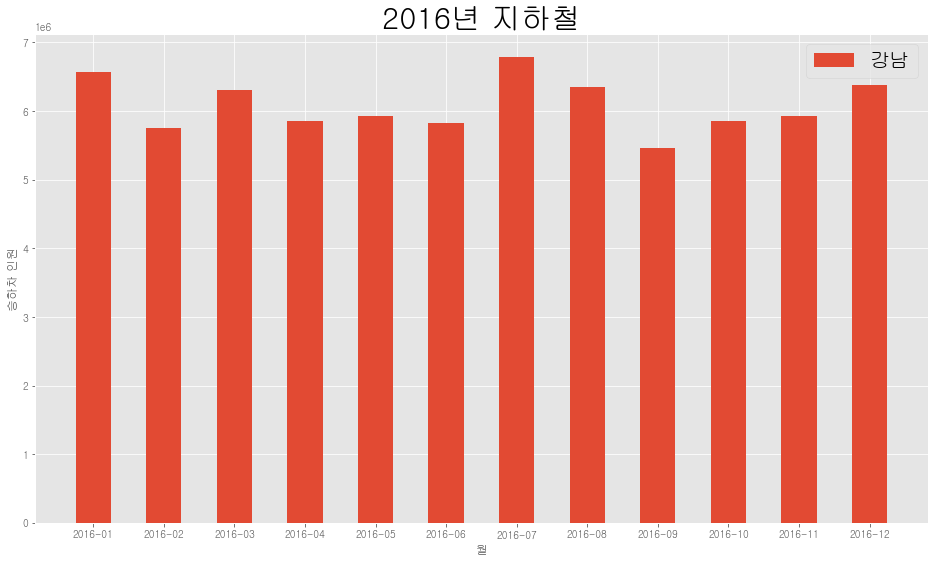

In [35]:
with plt.style.context("ggplot"):
    p1 = plt.bar(graph.index, graph.values, width=0.5)
    plt.title("2016년 지하철", fontsize=30)
    plt.xlabel("월")
    plt.ylabel("승하차 인원")
    plt.legend(p1, ['강남'], fontsize=20)

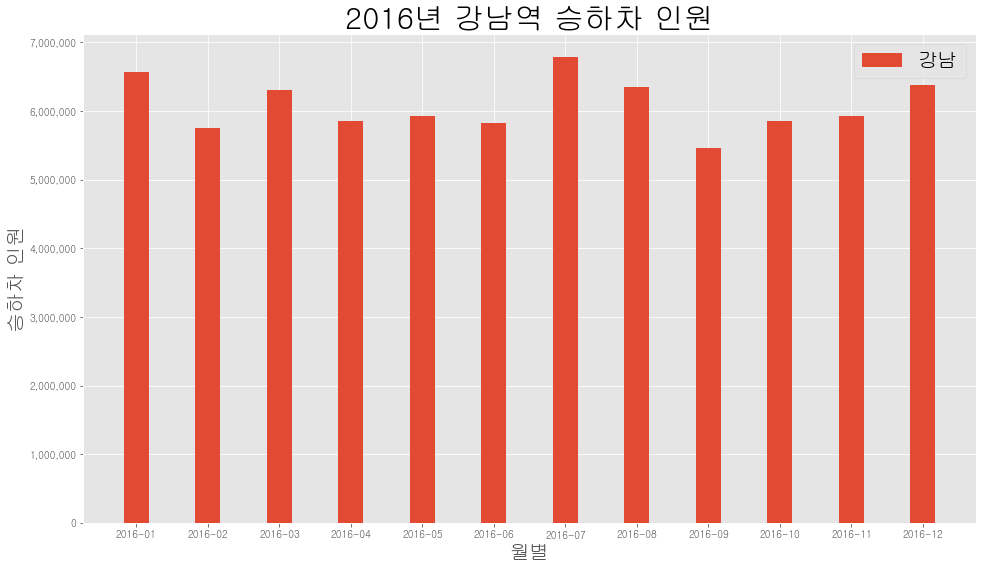

In [36]:
import matplotlib as mpl
with plt.style.context('ggplot'):
    bar_width = 0.35
    fig, ax = plt.subplots(1)
    ax.bar(graph.index, graph.values, width=bar_width)
    ax.set_xlabel('월별', fontsize=20)
    ax.set_ylabel('승하차 인원' , fontsize=20)
    ax.set_title('2016년 강남역 승하차 인원', fontsize=30)
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.legend(['강남'],fontsize=20)

In [37]:
kangnam_month_gubun = kangnam.groupby(['월', '구분']).agg('sum')

In [38]:
k_m_gubun = kangnam_month_gubun.apply(lambda x : sum(x), axis=1)

In [39]:
data1 = pd.DataFrame(k_m_gubun)

In [40]:
data1.reset_index(inplace=True)

In [69]:
data1

,월,구분,0
0,2016-01,승차,3257354
1,2016-01,하차,3308383
2,2016-02,승차,2857897
3,2016-02,하차,2897333
4,2016-03,승차,3137048
5,2016-03,하차,3171109
6,2016-04,승차,2901249
7,2016-04,하차,2955286
8,2016-05,승차,2937838
9,2016-05,하차,2981989


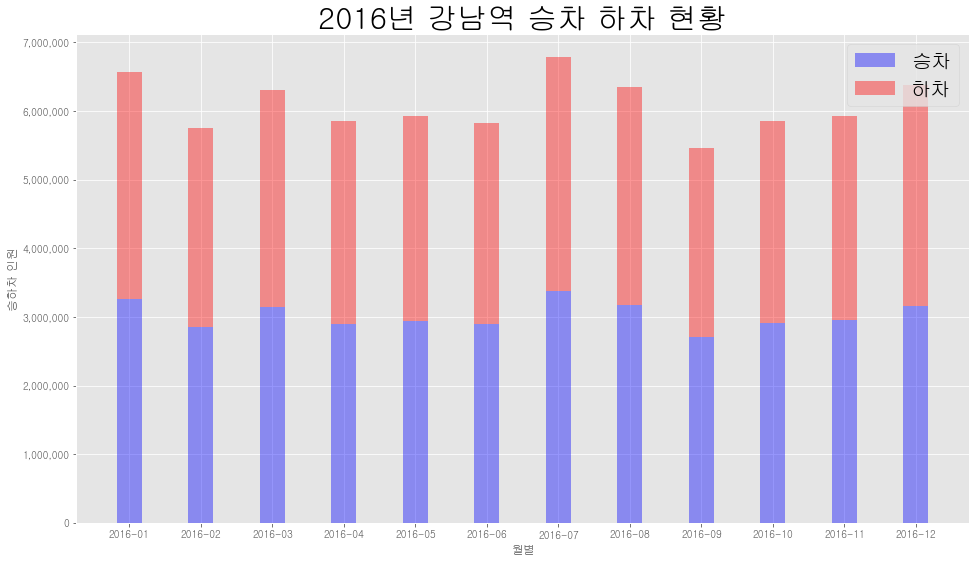

In [41]:
with plt.style.context('ggplot'):
    bar_width = 0.35
    opacity = 0.4
    fig, ax = plt.subplots(1)
    rect1 = ax.bar(data1.query("구분=='승차'")['월'], data1.query("구분=='승차'")[0],bar_width, alpha=opacity, color='b', label='up')
    rect2 = ax.bar(data1.query("구분=='하차'")['월'], data1.query("구분=='하차'")[0],bar_width, alpha=opacity, color='r', bottom= data1.query("구분=='승차'")[0],label='up')
    ax.set_xlabel('월별')
    ax.set_ylabel('승하차 인원')
    ax.set_title('2016년 강남역 승차 하차 현황', fontsize=30)
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.legend((rect1[0], rect2[0]), ('승차', '하차'), fontsize=20)

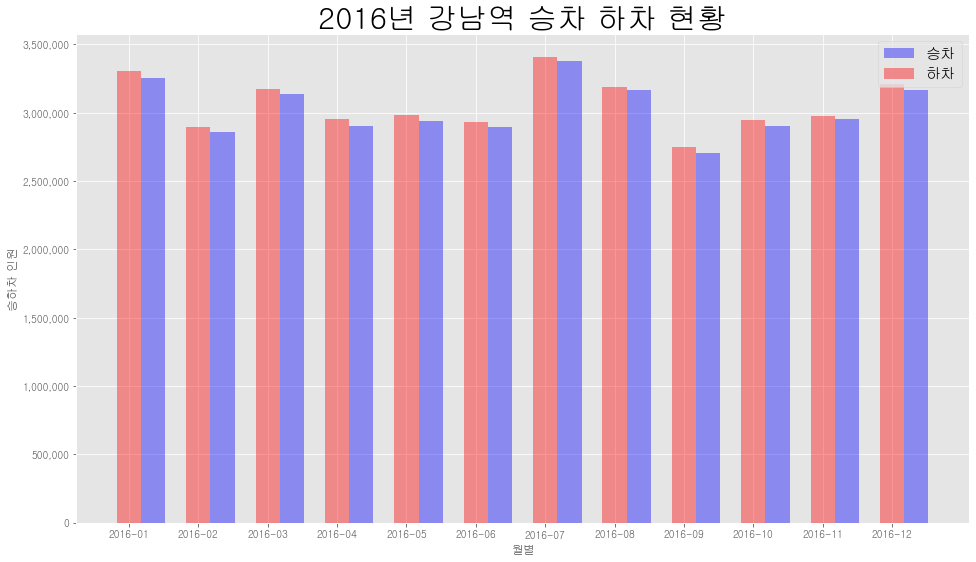

In [42]:
import numpy as np
with plt.style.context('ggplot'):
    bar_width = 0.35
    opacity = 0.4
    fig, ax = plt.subplots(1)
    rect1 = ax.bar(np.arange(12) + bar_width, data1.query("구분=='승차'")[0],bar_width, alpha=opacity, color='b', label='up')
    rect2 = ax.bar(data1.query("구분=='하차'")['월'], data1.query("구분=='하차'")[0],bar_width, alpha=opacity, color='r', label='up')
    ax.set_xlabel('월별')
    ax.set_ylabel('승하차 인원')
    ax.set_title('2016년 강남역 승차 하차 현황', fontsize=30)
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.legend((rect1[0], rect2[0]), ('승차', '하차'), fontsize=15)

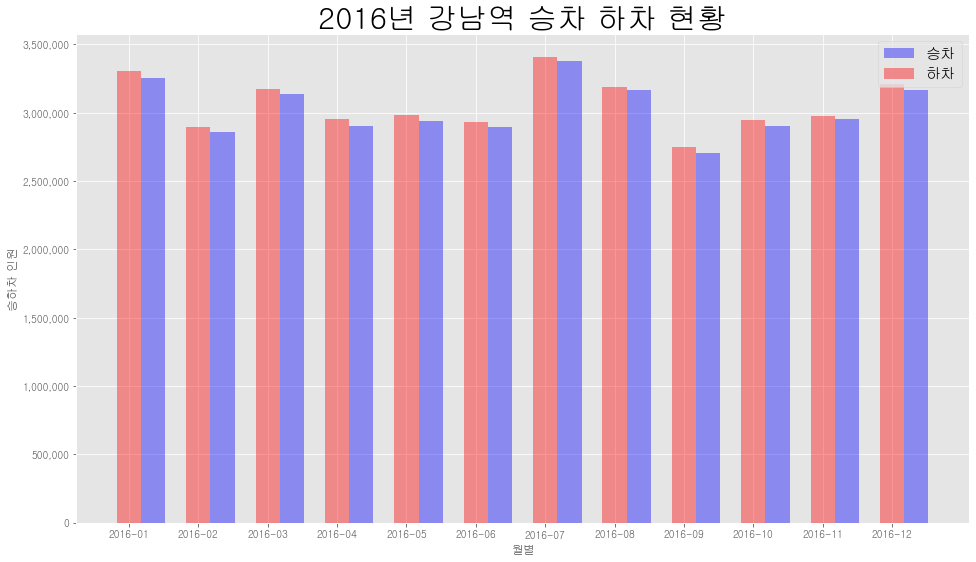

In [43]:
import numpy as np
with plt.style.context('ggplot'):
    bar_width = 0.35
    opacity = 0.4
    fig, ax = plt.subplots(1)
    rect1 = ax.bar(np.arange(12) + bar_width, data1.query("구분=='승차'")[0],bar_width, alpha=opacity, color='b', label='up')
    rect2 = ax.bar(data1.query("구분=='하차'")['월'], data1.query("구분=='하차'")[0],bar_width, alpha=opacity, color='r', label='up')
    ax.set_xlabel('월별')
    ax.set_ylabel('승하차 인원')
    ax.set_title('2016년 강남역 승차 하차 현황', fontsize=30)
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.legend((rect1[0], rect2[0]), ('승차', '하차'), fontsize=15)

In [70]:
tmp = data1[data1['구분'] =='승차'].copy()

In [71]:
tmp['test'] = data1[data1['구분'] =='하차'][0].values

In [72]:
tmp.drop(['구분'], axis=1, inplace=True)

In [47]:
from datetime import datetime, date, time

In [48]:
datetime.strptime('2016-01', '%Y-%m')

datetime.datetime(2016, 1, 1, 0, 0)

In [73]:
tmp.columns = ['월', '승차', '하차']

In [74]:
tmp.set_index('월', inplace=True)

In [76]:
tmp.columns

Index(['승차', '하차'], dtype='object')

In [75]:
tmp

,승차,하차
월,,
2016-01,3257354,3308383
2016-02,2857897,2897333
2016-03,3137048,3171109
2016-04,2901249,2955286
2016-05,2937838,2981989
2016-06,2893814,2932549
2016-07,3379605,3409181
2016-08,3166476,3189492
2016-09,2709059,2751835


In [77]:
tmp.index.tolist()

['2016-01',
 '2016-02',
 '2016-03',
 '2016-04',
 '2016-05',
 '2016-06',
 '2016-07',
 '2016-08',
 '2016-09',
 '2016-10',
 '2016-11',
 '2016-12']

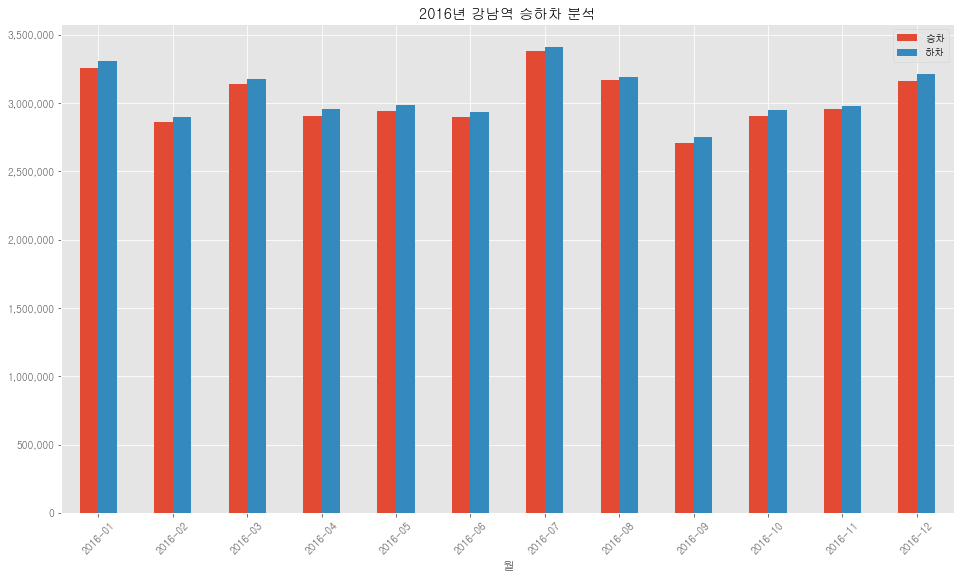

In [78]:
with plt.style.context('ggplot'):
    ax = tmp.plot(kind='bar', stacked=False, title="지하철")
    plt.xticks(range(12),tmp.index.tolist())
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.xticks(rotation=45)
    plt.title('2016년 강남역 승하차 분석')
    plt.legend(['승차', '하차'])

In [54]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
pd.DataFrame(d)

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


<AxesSubplot:title={'center':'The title of my graph'}>

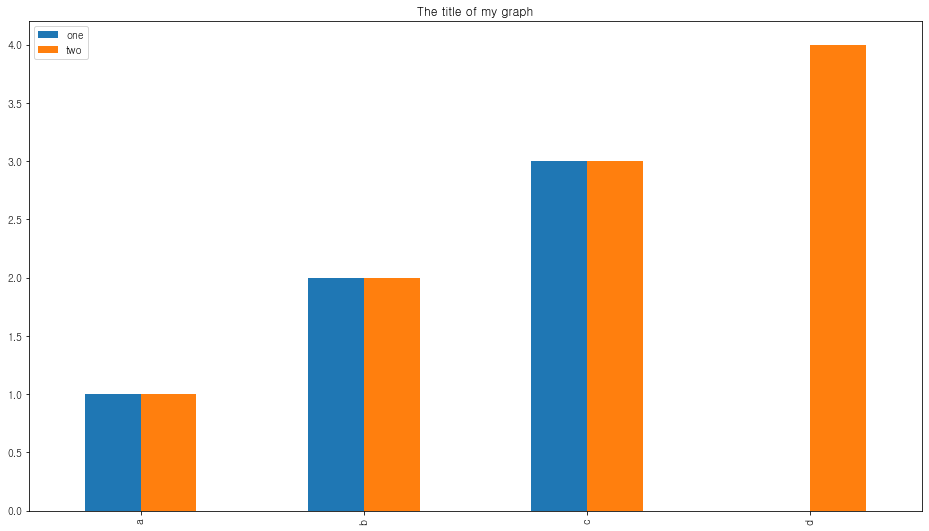

In [55]:
my_df = pd.DataFrame(d)
my_df.plot(kind='bar',stacked=False,title="The title of my graph")

# 역명으로

In [56]:
subway = df_all.groupby(['역명']).agg('sum')

In [57]:
subway_trans = subway.apply(lambda x : sum(x), axis=1)

In [58]:
subway_trans_1 = pd.DataFrame(subway_trans, columns=['counts'])

In [59]:
subway_trans_1

,counts
역명,
가락시장(340),6592770
강남(222),72989920
강변(214),36523673
건대입구(212),34947918
경복궁(317),19243308
...,...
합정(238),24807004
혜화(420),32442475
홍대입구(239),57959028


In [60]:
rank = subway_trans_1.sort_values(by=['counts'], ascending=False).iloc[:30,:]

In [61]:
rank

,counts
역명,
강남(222),72989920
잠실(216),59959378
홍대입구(239),57959028
신림(230),52797959
구로디지털단지(232),46290426
신도림(234),45882099
서울역(150),43057432
고속터미널(329),42586946
삼성(219),41763727


In [62]:
subway_trans_1.nlargest(15, 'counts')

,counts
역명,
강남(222),72989920
잠실(216),59959378
홍대입구(239),57959028
신림(230),52797959
구로디지털단지(232),46290426
신도림(234),45882099
서울역(150),43057432
고속터미널(329),42586946
삼성(219),41763727


In [63]:
subway_trans_1.nsmallest(15, 'counts')

,counts
역명,
도림천(247),804083
남태령(434),990047
지축(309),995325
신답(245),1049878
용두(250),1706585
용답(244),1885032
동작(431),2043352
학여울(336),2344556
신설동(246),2859380


In [64]:
82856 *365

30242440

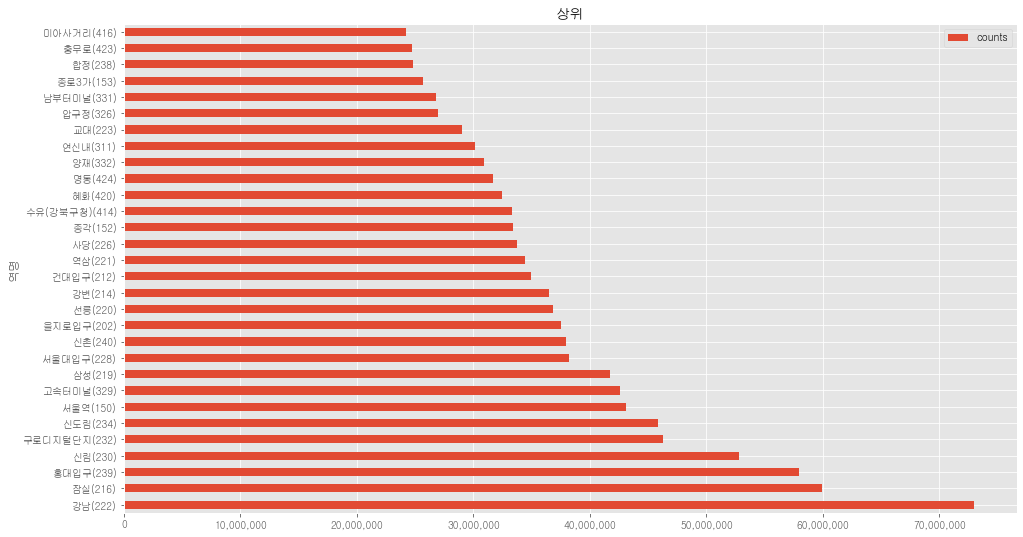

In [65]:
with plt.style.context('ggplot'):
    ax = rank.plot(kind='barh', grid=True)
    ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.title("상위")
    plt.show()